In [65]:
import sys
sys.path.append("..")

import Essentials


In [66]:
import numpy as np

from sklearn.preprocessing import StandardScaler
import Essentials
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score
from abc import ABC, abstractmethod

In [67]:
a = np.load('C:\\Users\\misha\\PLSSVD\\Data_Average.npz', allow_pickle=True)

In [68]:
x1 = a['X_test_1']
x2 = a['X_train_1']

y1 = a['Y_test_1']
y2 = a['Y_train_1']

In [69]:
timestamp1 = y1[:, 1]
timestamp2 = y2[:, 1]
y1 = y1[:, 0].reshape(len(y1), 1).astype(np.float64)
y2 = y2[:, 0].reshape(len(y2), 1).astype(np.float64)

In [70]:
x_test, x_val, y_test, y_val, timestamp_test, timestamp_val = train_test_split(
    x1, y1, timestamp1, test_size=0.5, random_state=42
)

In [71]:

class PLSSVDSoftSensor(Essentials.SoftSensor):
    def __init__(self, name, x_train, y_train, x_test, y_test, n_components=2):
        super().__init__(name)  # Правильный вызов базового конструктора
        self.r2_score = None
        self.best_n_components = None
        self.best_model = None
        self.train(x_train, y_train, x_test, y_test, n_components)

    def preprocessing(self, x):
        # Без предобработки
        return x

    def postprocessing(self, y):
        # Без постобработки
        return y

    def evaluate_model(self, x):
        return self.get_model().predict(x)

    def train(self, x_train, y_train, x_test, y_test, n_components=2):
        # Разделение тестовой выборки на две части
        x_test_part, x_val, y_test_part, y_val = train_test_split(
            x_test, y_test, test_size=0.5, random_state=42
        )

        best_score = -np.inf
        for i in range(1, n_components + 1):
            model = PLSRegression(n_components=i, scale=False)
            model.fit(x_train, y_train)
            score = r2_score(y_test_part, model.predict(x_test_part))
            if score > best_score:
                best_score = score
                self.best_n_components = i
                self.best_model = model

        self.set_model(self.best_model)
        self.r2_score = best_score

    def __str__(self):
        model = self.get_model()
        if model is not None:
            coefs_str = ", ".join([f"{coef:.3f}" for coef in model.coef_.ravel()])
            return (f"Модель PLSSVD с {self.best_n_components} компонентами: \n"
                    f"Коэффициенты: {coefs_str} \n"
                    f"R^2 (тестовая выборка): {self.r2_score:.3f}")
        else:
            return "Модель PLSSVD еще не обучена."




In [72]:
Test_sensor_1 = PLSSVDSoftSensor(name='PLS Sensor', x_train=x2, y_train=y2, x_test=x_test, y_test=y_test, n_components=10)

In [73]:
print(Test_sensor_1)

Модель PLSSVD с 9 компонентами: 
Коэффициенты: 0.070, -0.042, -0.055, 0.046, 0.011, 0.001, -0.014, 0.048, -0.003, 0.001, 0.048, -0.003, 0.079, 0.004, 0.001, 0.004, 0.091, 0.051, -0.004, -0.006, 0.011, -0.002, 0.082, 0.001, -0.035, 0.007, -0.172, 0.097, -0.092, -0.066, -0.009, -0.032, -0.020, 0.003, -0.006, 0.007, -0.088, 0.007, 0.021, -0.002, -0.084, -0.041, -0.025, -0.021, -0.026, 0.004, 0.050, -0.020, 0.001, 0.000, 0.000, 0.001, -0.028, 0.001, -0.022, 0.001, -0.000, -0.039, 0.000, 0.005, -0.034, 0.098, -0.058, -0.045, -0.065, 0.006, -0.084, -0.026, -0.036, -0.039, 0.006, -0.010, -0.012, -0.000, -0.063, -0.004, -0.011, -0.019, -0.014, -0.018, 0.018, 0.006, -0.001, -0.004, 0.001, -0.043, -0.023, 0.003, -0.008, 0.003, 0.031, -0.034, -0.000, -0.025, -0.000, -0.000 
R^2 (тестовая выборка): 0.830


In [74]:
metric = Essentials.R2Metric()

In [75]:
test_visual = Essentials.Visualizer(x2, y2, timestamp2, [metric], 'Test SoftSensor R2 metric')

            Coefficient of determination
PLS Sensor                      0.792177


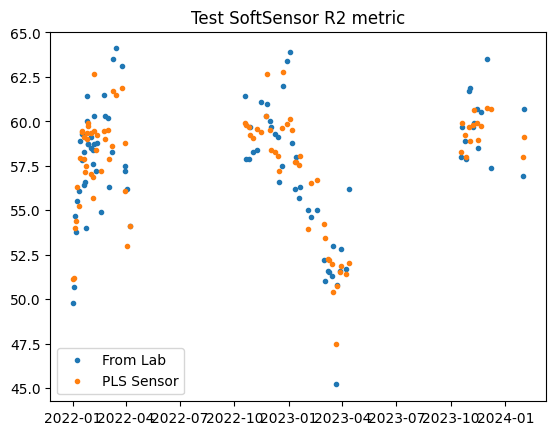

In [76]:
test_visual.visualize([Test_sensor_1])

In [77]:
test_visual_2 = Essentials.Visualizer(x_test, y_test, timestamp_test, [metric], 'Test SoftSensor R2 metric')

            Coefficient of determination
PLS Sensor                      0.726468


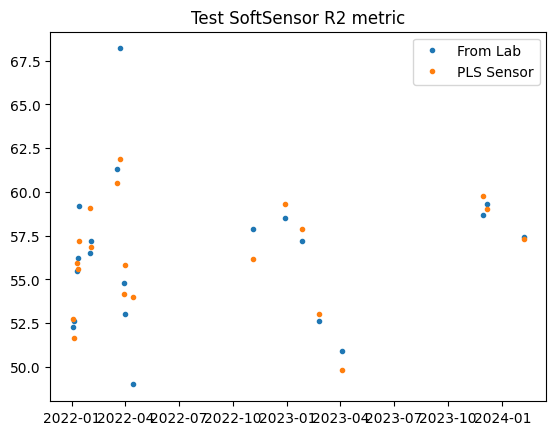

In [78]:
test_visual_2.visualize([Test_sensor_1])

In [79]:
test_visual_3 = Essentials.Visualizer(x_val, y_val, timestamp_val, [metric], 'Test SoftSensor R2 metric')

            Coefficient of determination
PLS Sensor                      0.446665


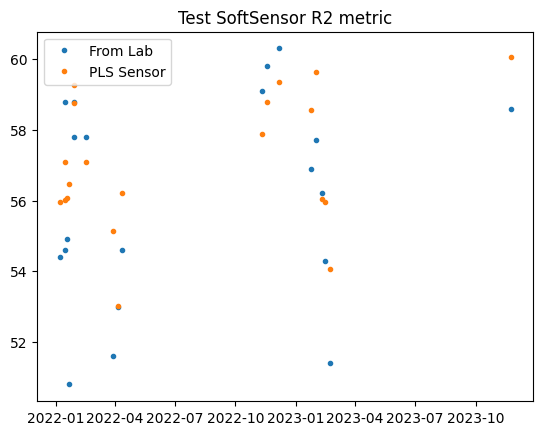

In [80]:
test_visual_3.visualize([Test_sensor_1])